# Ioannou_Georgios


## Copyright © 2022 by Georgios Ioannou


___
<h1 align="center"> Natural Language Processing </h1>

> For todays exersice we will be doing __two things__.  The first is to build the same model with the same data that we did in the lecture, the second will be to build a new model with new data. 

> ## PART 1: 
>> 20 Newsgroups Corpus


> ## PART 2:
>> Republican vs Democrat Tweet Classifier


___
<h2 align="center"> Libraries </h2>


In [1]:
# Import libraries.

# Import pandas for data handling.
import pandas as pd

# NLTK is our Natural-Language-Took-Kit.
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Libraries for helping us with strings.
import string

# Regular Expression Library.
import re

# Import our text vectorizers.
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Import our classifiers.
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# Import some ML helper function.
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV # helper function for hyper-parameter turning.

# Import our metrics to evaluate our model.
from sklearn import metrics
from sklearn.metrics import classification_report

# Library for plotting.
import matplotlib.pyplot as plt
import seaborn as sns

# Download packages from nltk.
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stopwords = stopwords.words('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\GEORGIOS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\GEORGIOS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\GEORGIOS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


___
<h2 align="center"> Remember our main steps motto "ISBE". </h2>

<h3 align="center"> Main Steps when building a Machine Learning Model. </h3>

1. <b>I</b> - Inspect and explore data.
2. <b>S</b> - Select and engineer features.
3. <b>B</b> - Build and train model.
4. <b>E</b> - Evaluate model.


___
# PART 1: 20 Newsgroups Corpus


___
## #1 Inspect and Explore Data

1. Load the 20-newsgroups.csv data into a dataframe.
2. Print the shape.
3. Inspect / remove nulls and duplicates.
4. Find class balances, print out how many of each topic_category there are.


In [2]:
# 1. Load the 20-newsgroups.csv data into a dataframe.

# Read the file 20-newsgroups.csv located inside the data folder and then load the data.
df = pd.read_csv('data/20-newsgroups.csv')

# Print/Display/Return the first 5 rows of the file 20-newsgroups.csv to make sure the file was loaded successfully.
df.head()


,id,message,topic,topic_category
0,0,From: lerxst@wam.umd.edu (where's my thing)\r\...,7,rec.autos
1,1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,3,From: jgreen@amber (Joe Green)\r\nSubject: Re:...,1,comp.graphics
4,4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space


In [3]:
# 2. Print the shape.

df.shape


(11314, 4)

In [4]:
# 3. Inspect / remove nulls and duplicates.

print('NULLS')
print(df.isnull().sum(), '\n')
print('Duplicates')
print('df.duplicated().sum() =', df.duplicated().sum())


NULLS
id                0
message           0
topic             0
topic_category    0
dtype: int64 

Duplicates
df.duplicated().sum() = 0


In [5]:
# 4. Find class balances, print out how many of each topic_category there are.

print('Class Balances')
df.topic_category.value_counts()


Class Balances


rec.sport.hockey            600
soc.religion.christian      599
rec.motorcycles             598
rec.sport.baseball          597
sci.crypt                   595
rec.autos                   594
sci.med                     594
comp.windows.x              593
sci.space                   593
comp.os.ms-windows.misc     591
sci.electronics             591
comp.sys.ibm.pc.hardware    590
misc.forsale                585
comp.graphics               584
comp.sys.mac.hardware       578
talk.politics.mideast       564
talk.politics.guns          546
alt.atheism                 480
talk.politics.misc          465
talk.religion.misc          377
Name: topic_category, dtype: int64

___
## #2 Select and Engineer Features

1. Text pre-processing.
2. Text vectorization.
3. Split our data into training and testing sets.

### #2.1 Text Pre-Processing (aka Feature engineering)

1. Make a function that makes all text lowercase. __(Lowercase all words)__
    * Do a sanity check by feeding in a test sentence into the function.

2. Make a function that removes all punctuation. __(Remove all punctuation)__
    * Do a sanity check by feeding in a test sentence into the function.

3. Make a function that removes all stopwords. __(Remove all stopwords)__
    * Do a sanity check by feeding in a test sentence into the function.

4. EXTRA CREDIT (This step only): Make a function that breaks words into their stem words. __(Stem words)__

5. Mandatory: Make a pipeline function that applies all the text processing functions you just built. __(Create pipeline function)__
    * Do a sanity check by feeding in a test sentence into the pipeline.

6. Mandatory: Use `df['message_clean'] = df[column].apply(???)` and apply the text pipeline to your text data column. __(Use pipeline function)__


In [6]:
# 1. Make a function that makes all text lowercase.

def make_lowercase(input_string):
    return input_string.lower()


test_string = 'This is A SENTENCE with LOTS OF CAPS.'
make_lowercase(test_string)


'this is a sentence with lots of caps.'

In [7]:
# 2. Make a function that removes all punctuation.

def remove_punctuation(input_string):    
    input_string = re.sub(r'[^\w\s]','',input_string)
    return input_string


test_string = 'This is a sentence! 50 With lots of punctuation??? & other #things.'
remove_punctuation(test_string)


'This is a sentence 50 With lots of punctuation  other things'

In [8]:
# 3. Make a function that removes all stopwords.

def remove_stopwords(input_string):
    words = word_tokenize(input_string)
    valid_words = []
    
    for word in words:
        if word not in stopwords:
            valid_words.append(word)

    input_string = ' '.join(valid_words)
    
    return input_string


test_string = 'This is a sentence! With some different stopwords i have added in here.'
remove_stopwords(test_string)


'This sentence ! With different stopwords added .'

In [9]:
# 4. EXTRA CREDIT: Make a function that breaks words into their stem words.

def stem_words(input_string):
    porter = PorterStemmer()
    words = word_tokenize(input_string)
    valid_words = []
    
    for word in words:
        stemmed_word = porter.stem(word)
        valid_words.append(stemmed_word)
    
    input_string = ' '.join(valid_words)

    return input_string 


test_string = 'I played and started playing with players and we all love to play with plays'

stem_words(test_string)


'i play and start play with player and we all love to play with play'

In [10]:
# 5. MANDATORY: Make a pipeline function that applies all the text processing functions you just built.

def pipeline(input_string):
    input_string = make_lowercase(input_string)
    input_string = remove_punctuation(input_string)
    input_string = remove_stopwords(input_string)
    input_string = stem_words(input_string)
    return input_string


test_string = 'I played and started playing with players and we all love to play with plays'
pipeline(test_string)


'play start play player love play play'

In [11]:
# 6. Mandatory: Use `df[column].apply(???)` and apply the text pipeline to your text data column. 

df['message_clean'] = df['message']
df['message_clean'] = df['message'].apply(pipeline)

print('ORIGINAL TEXT:\n\n', df['message'][0])
print('CLEANED TEXT:\n\n', df['message_clean'][0])


ORIGINAL TEXT:

 From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





CLEANED TEXT:

 lerxstwamumdedu where thing subject car nntppostinghost rac3wamumdedu organ univers maryland colleg park line 15 wonder anyon could enlighten car saw day 2door sport car look late 60 earli 70 call bricklin door realli small addit front bumper se

### #2.2 Text Vectorization

1. Define your `X` and `y` data.

2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
    * Do you want to use n-grams..?

3. Fit your vectorizer using your X data.
    * Remember, this process happens IN PLACE.

4. Transform your X data using your fitted vectorizer.
    * `X = vectorizer.???`

5. Print the shape of your X.  How many features (aka columns) do you have?


In [12]:
# 1. Define your `X` and `y` data.

X = df['message_clean'].values

y = df['topic_category'].values


In [13]:
# 2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).

vectorizer = TfidfVectorizer()


In [14]:
# 3. Fit your vectorizer using your X data.

vectorizer.fit(X)


TfidfVectorizer()

In [15]:
# 4. Transform your X data using your fitted vectorizer.

X = vectorizer.transform(X)


In [16]:
# 5. Print the shape of your X.  How many features (aka columns) do you have?

print(X.shape, type(X))


(11314, 119708) <class 'scipy.sparse.csr.csr_matrix'>


### #2.3 Split our data into Training and Testing sets.


In [17]:
# Split our data into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

X_train_text = X_train
X_test_text = X_test


____
## #3 Build and Train Model

Use the Multinomial Naive Bayes classifier to classify these documents. 

1. Make a dictionary of the targeted parameters of the Multinomial Naive Bayes classifier.
2. Initalize your GridSearchCV with a Multinomial Naive Bayes classifier, your param_grid, and what you are optimizing for.
3. Fit your GridSearchCV with your training data.
4. Print the parameters of your best model.

Experiment with different alphas.  Use the alpha gives you the best result.

EXTRA CREDIT:  Use __GridSearchCV__ to programmatically do this for you.


In [18]:
MultinomialNB??
# help(MultinomialNB)


```python
Init signature: MultinomialNB(*, alpha=1.0, fit_prior=True, class_prior=None)
Source:        
class MultinomialNB(_BaseDiscreteNB):
    """
    Naive Bayes classifier for multinomial models.

    The multinomial Naive Bayes classifier is suitable for classification with
    discrete features (e.g., word counts for text classification). The
    multinomial distribution normally requires integer feature counts. However,
    in practice, fractional counts such as tf-idf may also work.

    Read more in the :ref:`User Guide <multinomial_naive_bayes>`.

    Parameters
    ----------
    alpha : float, default=1.0
        Additive (Laplace/Lidstone) smoothing parameter
        (0 for no smoothing).

    fit_prior : bool, default=True
        Whether to learn class prior probabilities or not.
        If false, a uniform prior will be used.

    class_prior : array-like of shape (n_classes,), default=None
        Prior probabilities of the classes. If specified the priors are not
        adjusted according to the data.

    Attributes
    ----------
    class_count_ : ndarray of shape (n_classes,)
        Number of samples encountered for each class during fitting. This
        value is weighted by the sample weight when provided.

    class_log_prior_ : ndarray of shape (n_classes,)
        Smoothed empirical log probability for each class.

    classes_ : ndarray of shape (n_classes,)
        Class labels known to the classifier

    coef_ : ndarray of shape (n_classes, n_features)
        Mirrors ``feature_log_prob_`` for interpreting `MultinomialNB`
        as a linear model.

        .. deprecated:: 0.24
            ``coef_`` is deprecated in 0.24 and will be removed in 1.1
            (renaming of 0.26).

    feature_count_ : ndarray of shape (n_classes, n_features)
        Number of samples encountered for each (class, feature)
        during fitting. This value is weighted by the sample weight when
        provided.

    feature_log_prob_ : ndarray of shape (n_classes, n_features)
        Empirical log probability of features
        given a class, ``P(x_i|y)``.

    intercept_ : ndarray of shape (n_classes,)
        Mirrors ``class_log_prior_`` for interpreting `MultinomialNB`
        as a linear model.

        .. deprecated:: 0.24
            ``intercept_`` is deprecated in 0.24 and will be removed in 1.1
            (renaming of 0.26).

    n_features_ : int
        Number of features of each sample.

        .. deprecated:: 1.0
            Attribute `n_features_` was deprecated in version 1.0 and will be
            removed in 1.2. Use `n_features_in_` instead.

    n_features_in_ : int
        Number of features seen during :term:`fit`.

        .. versionadded:: 0.24

    feature_names_in_ : ndarray of shape (`n_features_in_`,)
        Names of features seen during :term:`fit`. Defined only when `X`
        has feature names that are all strings.

        .. versionadded:: 1.0
```

In [19]:
# 1. Make a dictionary of the targeted parameters of the Multinomial Naive Bayes classifier.

params = {
    'alpha': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10, 0.15, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.00], 
    'fit_prior': [True, False]
         }


In [20]:
# 2. Initalize your GridSearchCV with a Multinomial Naive Bayes classifier, your param_grid, and what you are optimizing for.
#    Choose any of the five optimization strategies; accuracy, precision, recall, f1, or roc_auc.

grid_search_cv =  GridSearchCV( 
    estimator = MultinomialNB(), 
    param_grid = params, 
    scoring = 'f1_weighted',
    return_train_score = True)


In [21]:
# 3. Fit your GridSearchCV with your training data. 

grid_search_cv.fit(X_train, y_train)


GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07,
                                   0.08, 0.09, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0],
                         'fit_prior': [True, False]},
             return_train_score=True, scoring='f1_weighted')

In [22]:
# 4. Print the parameters of your best model. 
#    Print the best parameters it found.

print(grid_search_cv.best_params_)


{'alpha': 0.01, 'fit_prior': False}


___
## #4 Evaluate Model

1. Make new predicitions using our test data.
2. Print the accuracy of the model.
3. Print the confusion matrix of our predictions.
4. Using `classification_report` print the evaluation results for all the classes.


In [23]:
# 1. Make new predictions of our testing data.

y_pred = grid_search_cv.predict(X_test)

y_pred_proba = grid_search_cv.predict_proba(X_test)


In [24]:
# 2. Print the accuracy of the model.
accuracy = grid_search_cv.score(X_test, y_test)

print('Model Accuracy: %f' % accuracy)


Model Accuracy: 0.918767


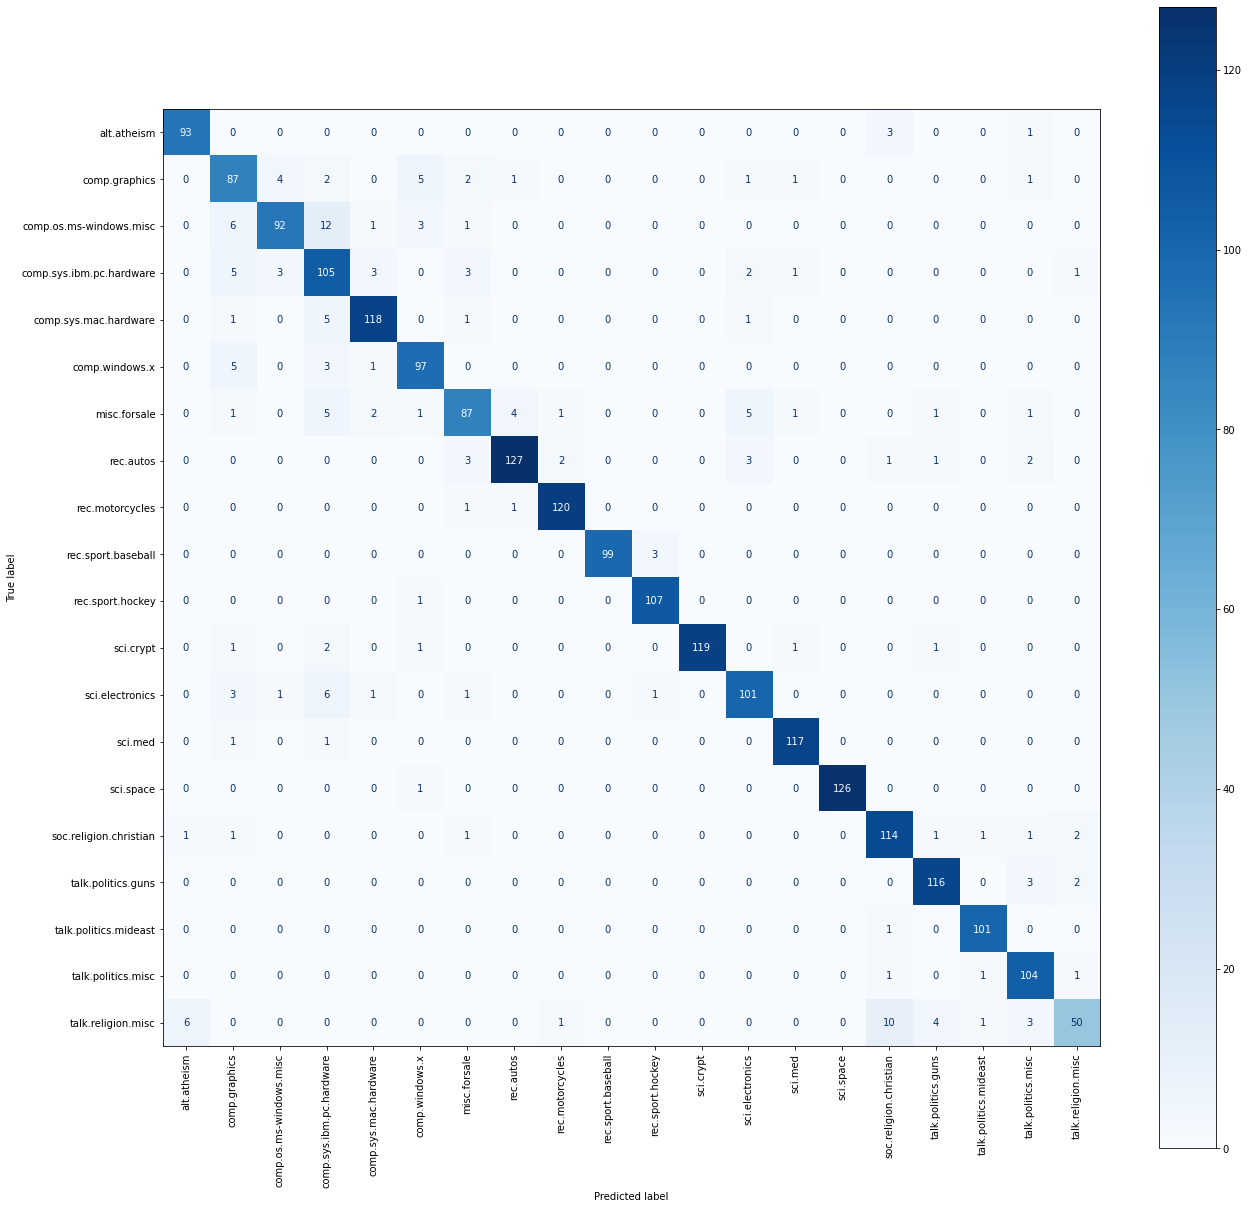

In [25]:
# 3. Plot the confusion matrix of our predictions.
fig, ax = plt.subplots(figsize=(21, 21))

disp = ConfusionMatrixDisplay.from_estimator(grid_search_cv, X_test, y_test,
                             display_labels=grid_search_cv.classes_,
                             cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=90)
disp


In [26]:
# 4. Using `classification_report` print the evaluation results for all the classes.

print(classification_report(y_test, y_pred, target_names=grid_search_cv.classes_))


                          precision    recall  f1-score   support

             alt.atheism       0.93      0.96      0.94        97
           comp.graphics       0.78      0.84      0.81       104
 comp.os.ms-windows.misc       0.92      0.80      0.86       115
comp.sys.ibm.pc.hardware       0.74      0.85      0.80       123
   comp.sys.mac.hardware       0.94      0.94      0.94       126
          comp.windows.x       0.89      0.92      0.90       106
            misc.forsale       0.87      0.80      0.83       109
               rec.autos       0.95      0.91      0.93       139
         rec.motorcycles       0.97      0.98      0.98       122
      rec.sport.baseball       1.00      0.97      0.99       102
        rec.sport.hockey       0.96      0.99      0.98       108
               sci.crypt       1.00      0.95      0.98       125
         sci.electronics       0.89      0.89      0.89       114
                 sci.med       0.97      0.98      0.97       119
         

___
## Manual predicition

Write a new sentence that you think will be classified as talk.politics.guns. 

1. Apply the text pipeline funciton to your sentence.
2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`
    * Note, the `transform` function accepts a list and not a individual string.
3. Use the model to predict your new `X`.
4. Print the prediction.


In [27]:
my_sentence = 'While guns should not be in the hands of violent offenders, current federal mandatory minimum sentences '\
            + 'for gun possession crimes are broadly written and sometimes produce absurd and unintended results, '\
            + 'treating nonviolent gun owners as if they had committed heinous crimes.'
print('my_sentence:', my_sentence, '\n')

# 1. Apply the text pipeline to your sentence.
my_sentence_pipeline = pipeline(my_sentence)
print('my_sentence_pipeline:', my_sentence_pipeline, '\n')

# 2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`.
my_sentence_pipeline_vectorized = vectorizer.transform([my_sentence_pipeline])
print('my_sentence_pipeline_vectorized:', my_sentence_pipeline_vectorized, '\n')

# 3. Use the model to predict your new `X`. 
grid_search_cv.predict(my_sentence_pipeline_vectorized)


# 4. Print the prediction.
pp = grid_search_cv.predict_proba(my_sentence_pipeline_vectorized)
for class_name, percentage in zip(grid_search_cv.classes_, pp.round(3)[0]):
    print(class_name, percentage )

print('\nPrediction:', grid_search_cv.predict(my_sentence_pipeline_vectorized)[0])

pd.DataFrame(grid_search_cv.predict_proba(my_sentence_pipeline_vectorized)[0],
             index=grid_search_cv.classes_,
             columns=['Probability']).sort_values(by='Probability', ascending=False).style.format('{:.2%}'.format)


my_sentence: While guns should not be in the hands of violent offenders, current federal mandatory minimum sentences for gun possession crimes are broadly written and sometimes produce absurd and unintended results, treating nonviolent gun owners as if they had committed heinous crimes. 

my_sentence_pipeline: gun hand violent offend current feder mandatori minimum sentenc gun possess crime broadli written sometim produc absurd unintend result treat nonviol gun owner commit heinou crime 

my_sentence_pipeline_vectorized:   (0, 116661)	0.13866614695453483
  (0, 113731)	0.1814280209816597
  (0, 111409)	0.30261203862281993
  (0, 109578)	0.15652939223555531
  (0, 102894)	0.13560531925625743
  (0, 100326)	0.17682630075454356
  (0, 96236)	0.11969410381454382
  (0, 92476)	0.14049514326314294
  (0, 91512)	0.18209589488679737
  (0, 88056)	0.1486409114586758
  (0, 86578)	0.19101361178348825
  (0, 85541)	0.28085491848133853
  (0, 74960)	0.18491927013303155
  (0, 68485)	0.228804980897382
  (0, 515

,Probability
talk.politics.guns,90.23%
talk.politics.misc,4.57%
talk.religion.misc,1.77%
talk.politics.mideast,1.37%
alt.atheism,1.21%
sci.crypt,0.38%
soc.religion.christian,0.18%
rec.motorcycles,0.13%
rec.autos,0.11%
sci.space,0.02%


___

# PART 2: Republican vs Democrat Tweet Classifier (Twitter Data)

This part of the exercise is un-guided on purpose.

Using the `dem-vs-rep-tweets.csv` build a classifier to determine if a tweet was written by a democrat or republican.

Can you get an f1-score higher than 82%?


___
## #1 Inspect and Explore Data

1. Load the dem-vs-rep-tweets.csv data into a dataframe.
2. Print the shape.
3. Inspect / remove nulls and duplicates.
4. Find class balances, print out how many of each topic_category there are.


In [28]:
# 1. Load the dem-vs-rep-tweets.csv data into a dataframe.

# Read the file dem-vs-rep-tweets.csv located inside the data folder and then load the data.
df = pd.read_csv('data/dem-vs-rep-tweets.csv')

# Print/Display/Return the first 5 rows of the file dem-vs-rep-tweets.csv to make sure the file was loaded successfully.
df.head()


,Party,Handle,Tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...


In [29]:
# 2. Print the shape

print('df.shape =', df.shape)


df.shape = (86460, 3)


In [30]:
# 3. Inspect / remove nulls and duplicates.

print('NULLS')
print(df.isnull().sum(),'\n')
print('Duplicates')
print('df.duplicated().sum() =', df.duplicated().sum(), '\n')
df.drop_duplicates(inplace=True)
print('Removing Duplicates')
print('df.duplicated().sum() =', df.duplicated().sum(), '\n')
print('df.shape =', df.shape)


NULLS
Party     0
Handle    0
Tweet     0
dtype: int64 

Duplicates
df.duplicated().sum() = 57 

Removing Duplicates
df.duplicated().sum() = 0 

df.shape = (86403, 3)


In [31]:
# 4. Find class balances, print out how many of each Party(Republican and Democrat) there are.

print('Class Balances')
df.Party.value_counts()


Class Balances


Republican    44362
Democrat      42041
Name: Party, dtype: int64

___
## #2 Select and Engineer Features

1. Text pre-processing.
2. Text vectorization.
3. Split our data into trainig and testing sets.

In [32]:
# 1. Text pre-processing.

df['Tweet_clean'] = df['Tweet']
df['Tweet_clean'] = df['Tweet'].apply(pipeline)

print('ORIGINAL TWEET:\n\n', df['Tweet'][0])
print('\nCLEANED TWEET:\n\n', df['Tweet_clean'][0])


ORIGINAL TWEET:

 Today, Senate Dems vote to #SaveTheInternet. Proud to support similar #NetNeutrality legislation here in the House… https://t.co/n3tggDLU1L

CLEANED TWEET:

 today senat dem vote savetheinternet proud support similar netneutr legisl hous httpstcon3tggdlu1l


In [33]:
# 2. Text vectorization.

X = df['Tweet_clean'].values

y = df['Party'].values

vectorizer = TfidfVectorizer()

vectorizer.fit(X)

X = vectorizer.transform(X)

print(X.shape, type(X))


(86403, 121124) <class 'scipy.sparse.csr.csr_matrix'>


In [34]:
# 3. Split our data into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

X_train_text = X_train
X_test_text = X_test


____
## #3 Build and Train Model

Use the Multinomial Naive Bayes classifier to classify these documents. 

1. Make a dictionary of the targeted parameters of the Multinomial Naive Bayes classifier.
2. Initalize your GridSearchCV with a Multinomial Naive Bayes classifier, your param_grid, and what you are optimizing for.
3. Fit your GridSearchCV with your training data.
4. Print the parameters of your best model.

Experiment with different alphas.  Use the alpha gives you the best result.


In [35]:
# 1. Make a dictionary of the targeted parameters of the Multinomial Naive Bayes classifier.

params = {
    'alpha': [x / 10 for x in range(1, 11)],
    'fit_prior': [True, False]
         }


In [36]:
# 2. Initalize your GridSearchCV with a Multinomial Naive Bayes classifier, your param_grid, and what you are optimizing for.
#    Choose any of the five optimization strategies; accuracy, precision, recall, f1, or roc_auc.

grid_search_cv =  GridSearchCV( 
    estimator = MultinomialNB(), 
    param_grid = params, 
    scoring = 'f1_weighted',
    return_train_score = True)


In [37]:
# 3. Fit your GridSearchCV with your training data.

grid_search_cv.fit(X_train, y_train)


GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0],
                         'fit_prior': [True, False]},
             return_train_score=True, scoring='f1_weighted')

In [38]:
# 4. Print the parameters of your best model. 
#    Print the best parameters it found.

print(grid_search_cv.best_params_)


{'alpha': 0.1, 'fit_prior': True}


___
## #4 Evaluate Model

1. Make new predicitions using our test data.
2. Print the accuracy of the model.
3. Print the confusion matrix of our predictions.
4. Using `classification_report` print the evaluation results for all the classes.


In [39]:
# 1. Make new predictions of our testing data.

y_pred = grid_search_cv.predict(X_test)

y_pred_proba = grid_search_cv.predict_proba(X_test)


In [40]:
# 2. Print the accuracy of the model.
accuracy = grid_search_cv.score(X_test, y_test)

print('Model Accuracy: %f' % accuracy)


Model Accuracy: 0.816105


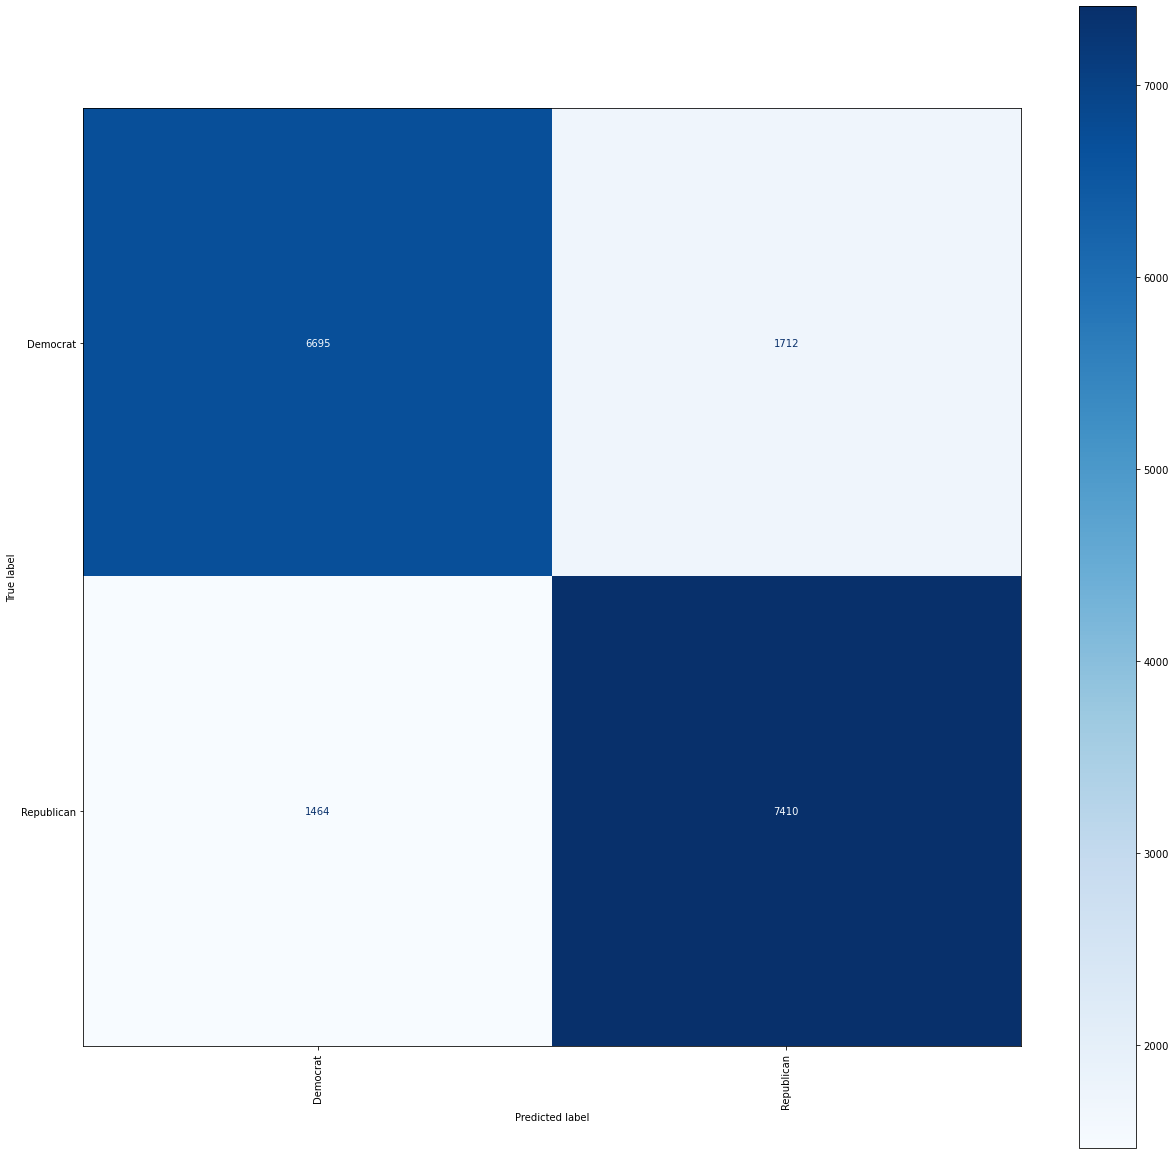

In [41]:
# 3. Plot the confusion matrix of our predictions.
fig, ax = plt.subplots(figsize=(21, 21))

disp = ConfusionMatrixDisplay.from_estimator(grid_search_cv, X_test, y_test,
                             display_labels=grid_search_cv.classes_,
                             cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=90)
disp


In [42]:
# 4. Using `classification_report` print the evaluation results for all the classes.

print(classification_report(y_test, y_pred, target_names=grid_search_cv.classes_))


              precision    recall  f1-score   support

    Democrat       0.82      0.80      0.81      8407
  Republican       0.81      0.84      0.82      8874

    accuracy                           0.82     17281
   macro avg       0.82      0.82      0.82     17281
weighted avg       0.82      0.82      0.82     17281

